
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ  Îã®Í≥ÑÎ≥Ñ ÏöîÏïΩ (ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨)  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                               step  count  mean_sec  median_sec  p95_sec  \
step_label                                                                  
Step 1                         ÏûÖÎ†•Î∞õÍ∏∞   2512     0.000       0.000    0.000   
Step 2                       ICC Î∂ÑÎ•ò   2512     0.651       0.606    0.842   
Step 3                     ICC Î∂ÑÍ∏∞Ï≤òÎ¶¨   2512     0.000       0.000    0.001   
Step 4           ÌÜµÌï© Ï†úÏïà Î∂ÑÎ¶¨ Î∞è ÏöîÏïΩ (ÏòÅÏñ¥)   2512     1.052       0.933    1.685   
Step 5                    Ï≤´Î≤àÏß∏ Ï†úÏïà ÏÑ†ÌÉù   2512     0.855       0.792    1.257   
Step 6              Top-10 Ïú†ÏÇ¨ Î¨∏ÏÑú Í≤ÄÏÉâ   2512     0.826       0.686    0.829   
Step 7          Self-Consistency ÌèâÍ∞Ä   2512     5.243       4.807    7.335   
Step 8          Self-Consistency ÌååÏã±   2512     0.000       0.000    0.000   
Step 9      Self-Consistency ÌÖåÏù¥Î∏î Ìè¨Îß∑   2512     0.000  

<Figure size 1000x400 with 0 Axes>

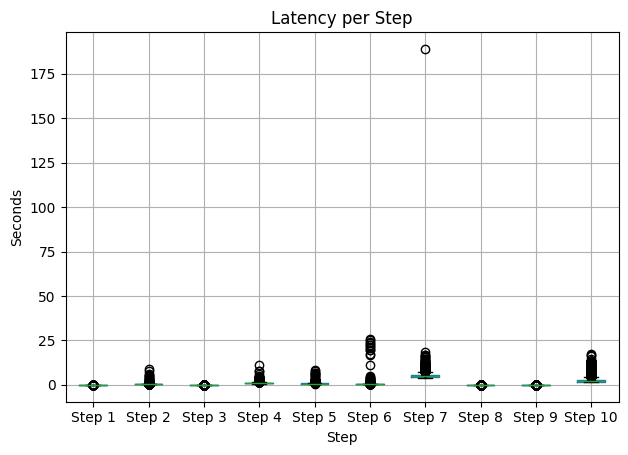

<Figure size 1000x400 with 0 Axes>

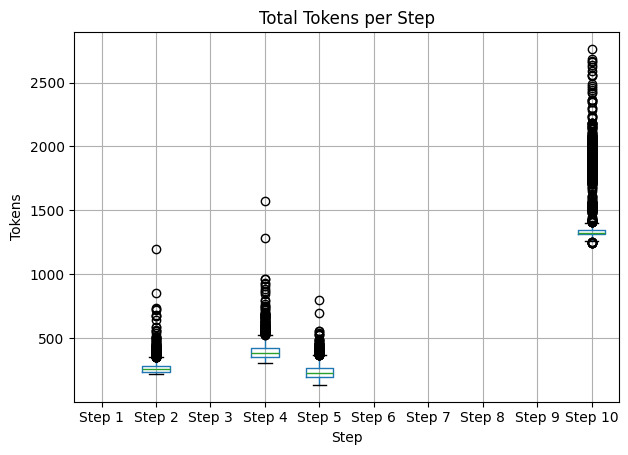

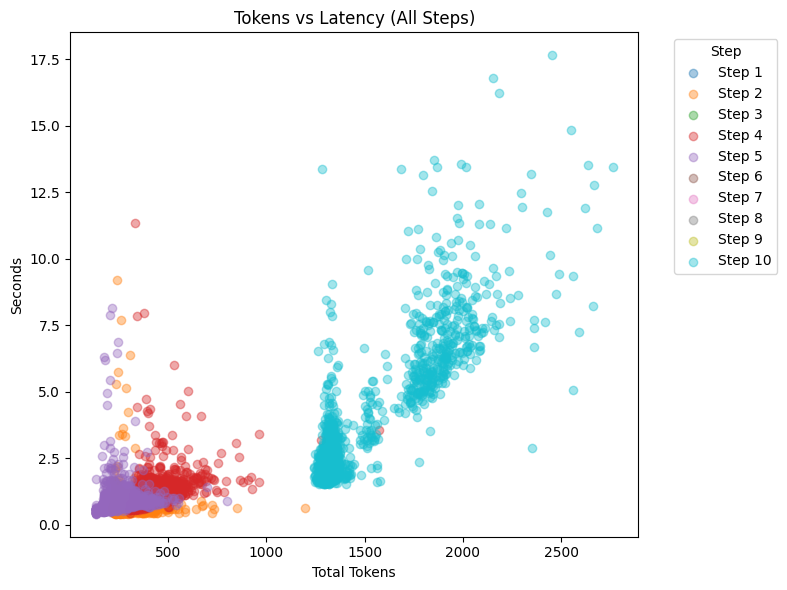

In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 0. (ÌïÑÏöî Ïãú) CSV Î°úÎìú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# try:
#     df
# except NameError:
#     dfs = [pd.read_csv(f"./result_mini_short_re_{i}.csv") for i in (1, 2, 3)]
#     df = pd.concat(dfs, ignore_index=True)

df = pd.read_csv("./test_result_labeled_v2.csv")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 1. long‚Äëform Ï†ÑÍ∞ú Ìï®Ïàò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def explode_timing(d):
    return (
        d[["ticket_id_hashed", "timing_results"]]
          .dropna()
          .assign(timing_results=lambda x: x["timing_results"].apply(ast.literal_eval))
          .explode("timing_results")
          .dropna()
          .assign(step=lambda x: x["timing_results"].str[0],
                  seconds=lambda x: x["timing_results"].str[1].astype(float))
    )

def explode_tokens(d):
    return (
        d[["ticket_id_hashed", "token_usage_results"]]
          .dropna()
          .assign(token_usage_results=lambda x: x["token_usage_results"].apply(ast.literal_eval))
          .explode("token_usage_results")
          .dropna()
          .assign(step=lambda x: x["token_usage_results"].apply(lambda y: y["step"]),
                  total_tokens=lambda x: x["token_usage_results"].apply(lambda y: y["total_tokens"]).astype(float),
                  prompt_tokens=lambda x: x["token_usage_results"].apply(lambda y: y["prompt_tokens"]).astype(float),
                  completion_tokens=lambda x: x["token_usage_results"].apply(lambda y: y["completion_tokens"]).astype(float))
    )

timing_long = explode_timing(df)
token_long  = explode_tokens(df)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 2. ÌïúÍ∏Ä Ïä§ÌÖùÎ™ÖÏùÑ ASCII ÎùºÎ≤®Î°ú Îß§Ìïë ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ‚îÄ‚îÄ 0) Î∂ÑÏÑù¬∑ÏãúÍ∞ÅÌôî Ï†ÑÏóê ‚ÄòÏ†ïÏùòÏó≠‚Äô ÏàúÏÑúÎ∂ÄÌÑ∞ ÌôïÏ†ï ‚îÄ‚îÄ
step_order = [
    "ÏûÖÎ†•Î∞õÍ∏∞",                       # Step 1
    "ICC Î∂ÑÎ•ò",                     # Step 2
    "ICC Î∂ÑÍ∏∞Ï≤òÎ¶¨",                 # Step 3
    "ÌÜµÌï© Ï†úÏïà Î∂ÑÎ¶¨ Î∞è ÏöîÏïΩ (ÏòÅÏñ¥)",   # Step 4
    "Ï≤´Î≤àÏß∏ Ï†úÏïà ÏÑ†ÌÉù",              # Step 5
    "Top-10 Ïú†ÏÇ¨ Î¨∏ÏÑú Í≤ÄÏÉâ",         # Step 6
    "Self-Consistency ÌèâÍ∞Ä",         # Step 7
    "Self-Consistency ÌååÏã±",         # Step 8
    "Self-Consistency ÌÖåÏù¥Î∏î Ìè¨Îß∑",   # Step 9
    "ÏµúÏ¢Ö Í≤∞Ï†ï",                    # Step 10
]
step_map = {name: f"Step {i+1}" for i, name in enumerate(step_order)}

for tbl in (timing_long, token_long):
    tbl["step_label"] = tbl["step"].map(step_map)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 3. merge & ÌååÏÉùÏßÄÌëú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
merged = pd.merge(
    timing_long[["ticket_id_hashed", "step", "step_label", "seconds"]],
    token_long[["ticket_id_hashed", "step", "total_tokens"]],
    on=["ticket_id_hashed", "step"],
    how="inner",
)
merged["tokens_per_sec"] = merged["total_tokens"] / merged["seconds"]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 4. summary Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 4. summary Í≥ÑÏÇ∞ (ÏàòÏ†ï) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
summary = (
    timing_long.groupby("step").agg(
        count=("seconds", "count"),
        mean_sec=("seconds", "mean"),
        median_sec=("seconds", "median"),
        p95_sec=("seconds", lambda s: s.quantile(0.95)),
        max_sec=("seconds", "max"),
    )
    .join(
        token_long.groupby("step").agg(
            mean_tok=("total_tokens", "mean"),
            median_tok=("total_tokens", "median"),
            p95_tok=("total_tokens", lambda s: s.quantile(0.95)),
            max_tok=("total_tokens", "max"),
        )
    )
    .join(
        merged.groupby("step").agg(
            mean_tps=("tokens_per_sec", "mean"),
            p95_tps=("tokens_per_sec", lambda s: s.quantile(0.95)),
        )
    )
    .reset_index()
    .assign(step_label=lambda x: x["step"].map(step_map))
    .set_index("step_label")
    .loc[[f"Step {i+1}" for i in range(len(step_order))]]
)

# 3‚ÄØÏûêÎ¶¨ Î∞òÏò¨Î¶º
float_cols = summary.select_dtypes(float).columns
summary[float_cols] = summary[float_cols].round(3)

print("\n‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ  Îã®Í≥ÑÎ≥Ñ ÏöîÏïΩ (ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨)  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ")
print(summary)


# 3‚ÄØÏûêÎ¶¨ Î∞òÏò¨Î¶º
float_cols = summary.select_dtypes(float).columns
summary[float_cols] = summary[float_cols].round(3)

print("\n‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ  Îã®Í≥ÑÎ≥Ñ ÏöîÏïΩ (ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨)  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ")
print(summary)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 5. ÏãúÍ∞ÅÌôî ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ 5. ÏãúÍ∞ÅÌôî (1‚Üí10 ÏàúÏÑú Í≥†Ï†ï) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
order_labels = [f"Step {i}" for i in range(1, len(step_order) + 1)]

# Ïπ¥ÌÖåÍ≥†Î¶¨ÌòïÏúºÎ°ú ÏàúÏÑú Í≥†Ï†ï
for tbl in (timing_long, token_long, merged):
    tbl["step_label"] = pd.Categorical(tbl["step_label"],
                                       categories=order_labels,
                                       ordered=True)

# ‚ë† Latency box‚Äëplot
plt.figure(figsize=(10, 4))
timing_long.boxplot(column="seconds", by="step_label")
plt.title("Latency per Step"); plt.suptitle("")
plt.xlabel("Step"); plt.ylabel("Seconds")
plt.tight_layout()

# ‚ë° Tokens box‚Äëplot
plt.figure(figsize=(10, 4))
token_long.boxplot(column="total_tokens", by="step_label")
plt.title("Total Tokens per Step"); plt.suptitle("")
plt.xlabel("Step"); plt.ylabel("Tokens")
plt.tight_layout()

# ‚ë¢ Tokens vs Latency scatter
plt.figure(figsize=(8, 6))
for step in order_labels:
    grp = merged[merged["step_label"] == step]
    plt.scatter(grp["total_tokens"], grp["seconds"], alpha=0.4, label=step)
plt.title("Tokens vs Latency (All Steps)")
plt.xlabel("Total Tokens"); plt.ylabel("Seconds")
plt.legend(title="Step", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

In [4]:
merged

ticket_id_hashed                step step_label   seconds  total_tokens  \
0              b838720              ICC Î∂ÑÎ•ò     Step 2  0.985711         231.0   
1              b838720  ÌÜµÌï© Ï†úÏïà Î∂ÑÎ¶¨ Î∞è ÏöîÏïΩ (ÏòÅÏñ¥)     Step 4  0.999677         342.0   
2              b838720           Ï≤´Î≤àÏß∏ Ï†úÏïà ÏÑ†ÌÉù     Step 5  0.727283         188.0   
3              b838720               ÏµúÏ¢Ö Í≤∞Ï†ï    Step 10  2.141000        1271.0   
4              b839504              ICC Î∂ÑÎ•ò     Step 2  0.620085         236.0   
...                ...                 ...        ...       ...           ...   
10043          293d3d8               ÏµúÏ¢Ö Í≤∞Ï†ï    Step 10  1.842508        1323.0   
10044          775ed0c              ICC Î∂ÑÎ•ò     Step 2  0.431420         262.0   
10045          775ed0c  ÌÜµÌï© Ï†úÏïà Î∂ÑÎ¶¨ Î∞è ÏöîÏïΩ (ÏòÅÏñ¥)     Step 4  1.713873         417.0   
10046          775ed0c           Ï≤´Î≤àÏß∏ Ï†úÏïà ÏÑ†ÌÉù     Step 5  0.761859         290.0   
10047          775ed0c               ÏµúÏ¢Ö Í≤∞Ï†ï    Step 10  1.799925        1323.0   

       tokens_per_sec  
0          234.348527  
1          342.110603  
2          258.496433  
3          593.647819  
4          380.593275  
...               ...  
10043      718.043171  
10044      607.296710  
10045      243.308556  
10046      380.648012  
10047      735.030687  

[10048 rows x 6 columns]

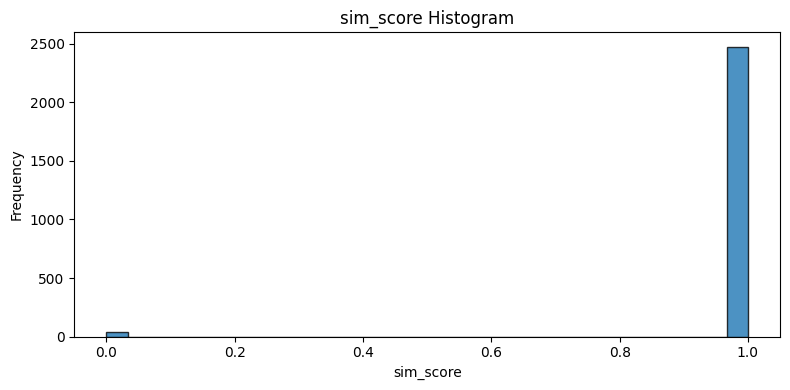

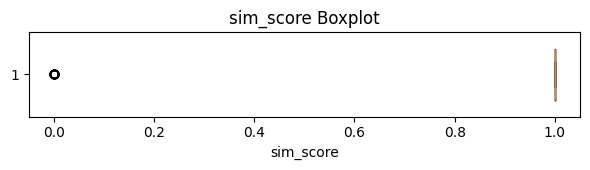

In [5]:
import matplotlib.pyplot as plt

# sim_score Series (0~1 Î≤îÏúÑ Ïù¥ÏÉÅÏπò ÌÅ¥Î¶Ω & NaN Ï†úÍ±∞)
sim = df["sim_score"].dropna().clip(0, 1)

# ‚îÄ‚îÄ ÌûàÏä§ÌÜ†Í∑∏Îû® ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.figure(figsize=(8, 4))
plt.hist(sim, bins=30, alpha=0.8, edgecolor="black")
plt.title("sim_score Histogram")
plt.xlabel("sim_score")
plt.ylabel("Frequency")
plt.tight_layout()

# ‚îÄ‚îÄ Î∞ïÏä§ÌîåÎ°Ø ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.figure(figsize=(6, 1.8))
plt.boxplot(sim, vert=False, widths=0.6)
plt.title("sim_score Boxplot")
plt.xlabel("sim_score")
plt.tight_layout()

plt.show()


In [6]:
summary

step  count  mean_sec  median_sec  p95_sec  \
step_label                                                                  
Step 1                         ÏûÖÎ†•Î∞õÍ∏∞   2512     0.000       0.000    0.000   
Step 2                       ICC Î∂ÑÎ•ò   2512     0.651       0.606    0.842   
Step 3                     ICC Î∂ÑÍ∏∞Ï≤òÎ¶¨   2512     0.000       0.000    0.001   
Step 4           ÌÜµÌï© Ï†úÏïà Î∂ÑÎ¶¨ Î∞è ÏöîÏïΩ (ÏòÅÏñ¥)   2512     1.052       0.933    1.685   
Step 5                    Ï≤´Î≤àÏß∏ Ï†úÏïà ÏÑ†ÌÉù   2512     0.855       0.792    1.257   
Step 6              Top-10 Ïú†ÏÇ¨ Î¨∏ÏÑú Í≤ÄÏÉâ   2512     0.826       0.686    0.829   
Step 7          Self-Consistency ÌèâÍ∞Ä   2512     5.243       4.807    7.335   
Step 8          Self-Consistency ÌååÏã±   2512     0.000       0.000    0.000   
Step 9      Self-Consistency ÌÖåÏù¥Î∏î Ìè¨Îß∑   2512     0.000       0.000    0.000   
Step 10                       ÏµúÏ¢Ö Í≤∞Ï†ï   2512     3.053       2.197    7.697   

            max_sec  mean_tok  median_tok  p95_tok  max_tok  mean_tps  p95_tps  
step_label                                                                      
Step 1        0.000       NaN         NaN      NaN      NaN       NaN      NaN  
Step 2        9.207   269.714       255.0   359.45   1198.0   438.664  622.738  
Step 3        0.001       NaN         NaN      NaN      NaN       NaN      NaN  
Step 4       11.356   401.939       382.0   535.00   1571.0   406.785  506.645  
Step 5        8.133   238.375       227.0   341.00    801.0   294.802  417.631  
Step 6       25.949       NaN         NaN      NaN      NaN       NaN      NaN  
Step 7      188.822       NaN         NaN      NaN      NaN       NaN      NaN  
Step 8        0.001       NaN         NaN      NaN      NaN       NaN      NaN  
Step 9        0.000       NaN         NaN      NaN      NaN       NaN      NaN  
Step 10      17.641  1419.195      1326.0  1957.80   2762.0   564.094  768.481

In [7]:
summary.to_csv("./step_summary_mini_short_re.csv", encoding="utf-8-sig")

## ÌÇ§ÏõåÎìú Ïú†ÏÇ¨ÎèÑ Ï†Ñ Ï†ÑÏ≤òÎ¶¨

In [79]:
import pandas as pd

# dfs = [pd.read_csv(f"./result_short_new_{i}.csv") for i in (1, 2)]
# df = pd.concat(dfs, ignore_index=True)

df = pd.read_csv("./phase2_result_mini_sc1_dup_only.csv")

rag_df = pd.read_csv("./rag_data.csv", usecols=["ticket_id_hashed", "keyword"])

# Í∏∞Ï°¥ df ÏôÄ LEFT JOIN
df = df.merge(rag_df, on="ticket_id_hashed", how="left")

print(f"Î≥ëÌï© ÏôÑÎ£å: df.shape = {df.shape}")
print(df[["ticket_id_hashed", "keyword"]].head())

Î≥ëÌï© ÏôÑÎ£å: df.shape = (206, 20)


KeyError: "['keyword'] not in index"

In [64]:
import re

df["doc_ticket_id"] = (
    df["final_result"]
      .fillna("")                                  # NaN ÏïàÏ†Ñ Ï≤òÎ¶¨
      .str.extract(r"‚úÖ\s*Final Recommended Document:\s*([^\n,]+)", flags=re.I)
      .iloc[:, 0]                                  # capture group 1
      .str.strip()
)

df["doc_ticket_id"] = df["doc_ticket_id"].str.replace(" ", "", regex=False)
df["doc_ticket_id"] = df["doc_ticket_id"].str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
print(df[["final_result", "doc_ticket_id"]].head())

df["doc_summary"] = (
    df["final_result"]
      .fillna("")                                  # NaN ÏïàÏ†Ñ Ï≤òÎ¶¨
      .str.extract(r"üìÑ\s*Selected Document Summary:\s*([^\n,]+)", flags=re.I)
      .iloc[:, 0]                                  # capture group 1
      .str.strip()
)

# Îß® ÏïûÎí§ Í≥µÎ∞± Ï†úÍ±∞ ÌõÑ, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
df["doc_summary"] = df["doc_summary"].str.strip()
df["doc_summary"] = df["doc_summary"].str.replace(r"[^0-9a-zA-Z_ ]", "", regex=True)
print(df[["final_result", "doc_summary"]].head())

df.to_csv("./merged_short_new.csv", index=False, encoding="utf-8-sig")

                                        final_result doc_ticket_id
0  > ‚úÖ Final Recommended Document: 8a913b3\n> üìÑ S...       8a913b3
1  > ‚úÖ Final Recommended Document: e90e341  \n> üìÑ...       e90e341
2  > ‚úÖ Final Recommended Document: 94b1567  \n> üìÑ...       94b1567
3  > ‚úÖ Final Recommended Document: b4e41a3  \n> üìÑ...       b4e41a3
4  > ‚úÖ Final Recommended Document: 2680acb  \n> üìÑ...       2680acb
                                        final_result  \
0  > ‚úÖ Final Recommended Document: 8a913b3\n> üìÑ S...   
1  > ‚úÖ Final Recommended Document: e90e341  \n> üìÑ...   
2  > ‚úÖ Final Recommended Document: 94b1567  \n> üìÑ...   
3  > ‚úÖ Final Recommended Document: b4e41a3  \n> üìÑ...   
4  > ‚úÖ Final Recommended Document: 2680acb  \n> üìÑ...   

                                         doc_summary  
0  The user suggests designing a standtype refrig...  
1  The user suggests that the robot vacuum should...  
2  The user suggests that zone cleaning should

In [69]:
import pandas as pd

# ‚îÄ‚îÄ 1. ÌååÏùº Î°úÎìú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df = pd.read_csv("./merged_short_new.csv")
map_df = pd.read_csv("./rag_data.csv", usecols=["ticket_id_hashed", "keyword"])

# ‚îÄ‚îÄ 2. ticket_id ‚Üí keyword ÎîïÏÖîÎÑàÎ¶¨ Ï§ÄÎπÑ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
id2kw = dict(zip(map_df["ticket_id_hashed"], map_df["keyword"]))

# ‚îÄ‚îÄ 3. sim_keyword NaN Ï±ÑÏö∞Í∏∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df["sim_keyword"] = df["sim_keyword"].fillna(   # NaN Ïù∏ Í≤ΩÏö∞ÏóêÎßå
    df["doc_ticket_id"].map(id2kw)              # doc_ticket_id ‚Üí keyword
)

# ‚îÄ‚îÄ 4. Í≤∞Í≥º ÌôïÏù∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print(df[["doc_ticket_id", "sim_keyword"]].head())

  doc_ticket_id  sim_keyword
0       8a913b3  HWÎîîÏûêÏù∏Í∞úÏÑ†(Ïô∏Î∂Ä)
1       e90e341         ÎèÑÎ©¥Ìé∏Ïßë
2       94b1567       Ï≤≠ÏÜåÍµ¨Ïó≠ÏÑ§Ï†ï
3       b4e41a3       ÏïåÎ¶ºÏÑ∏Î∂ÄÏÑ§Ï†ï
4       2680acb  HWÎîîÏûêÏù∏Í∞úÏÑ†(Ïô∏Î∂Ä)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticket_id_hashed      2512 non-null   object 
 1   component_group       2512 non-null   object 
 2   components            2512 non-null   object 
 3   beforechange          990 non-null    object 
 4   afterchange           2511 non-null   object 
 5   ÏßÄÏó≠                    2512 non-null   object 
 6   generated_summary     2512 non-null   object 
 7   sim_score             2512 non-null   float64
 8   sim_keyword           2512 non-null   object 
 9   final_keyword         2507 non-null   object 
 10  final_result          2512 non-null   object 
 11  timing_results        2512 non-null   object 
 12  token_usage_results   2512 non-null   object 
 13  proposal_summary_all  2512 non-null   object 
 14  top10_table_md        2512 non-null   object 
 15  labels           

In [9]:
# final_keyword Ïª¨Îüº nan Í∞í ÏòàÏãú Î≥¥Í∏∞
# NaN Ïù∏ Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅ
nan_rows = df[df["final_keyword"].isna()]

# Î™á Í±¥Ïù∏ÏßÄ ÌôïÏù∏
print(f"NaN Ìñâ Í∞úÏàò: {len(nan_rows)}")

nan_rows

NaN Ìñâ Í∞úÏàò: 5


ticket_id_hashed component_group    components  \
668           69c07bd         ÏÑ∏ÌÉÅÍ∏∞/Í±¥Ï°∞Í∏∞           ÏÑ∏ÌÉÅÍ∏∞   
762           83635ff         ÏÑ∏ÌÉÅÍ∏∞/Í±¥Ï°∞Í∏∞           ÏÑ∏ÌÉÅÍ∏∞   
1886          dffb415          Í≥µÍ∏∞ Ï≤≠Ï†ïÍ∏∞         Í≥µÍ∏∞Ï≤≠Ï†ïÍ∏∞   
2294          af92c4f             ÎØ∏Î∂ÑÎ•ò  Refrigerator   
2304          b3b9579           ÏãùÍ∏∞ÏÑ∏Ï≤ôÍ∏∞         ÏãùÍ∏∞ÏÑ∏Ï≤ôÍ∏∞   

                                         beforechange  \
668                                               NaN   
762                                               NaN   
1886                                              NaN   
2294  I‚Äôd like the option to turn OFF the door alarm.   
2304                                              NaN   

                                            afterchange  ÏßÄÏó≠  \
668   ÏÑ∏ÌÉÅÎ¨ºÏùò Î¨¥Í≤åÎ•º Ï≤¥ÌÅ¨Ìï¥ÏÑú ÏÑ∏Ï†ú ÏñëÏùÑ Ï∂îÏ≤úÌïòÍ±∞ÎÇò ÏÖÄÌîÑÏ°∞Ï†àÌïòÎäî Í∏∞Îä•Ïù¥ ÌÉëÏû¨ÎêòÎ©¥ Ï¢ãÏùÑ Í±∞...  KR   
762                       ÏÑ∏ÌÉÅÍ∏∞ ÏûëÎèô ÏôÑÎ£å ÌõÑ ÏûêÎèô Î¨∏ Ïó¥Î¶¨Îäî Í∏∞Îä• Ï∂îÍ∞Ä ÏöîÎßù  KR   
1886                                     Ï∞®ÏùºÎìúÎùΩ Í∏∞Îä• Ï∂îÍ∞ÄÌï¥Ï£ºÏÑ∏Ïöî  KR   
2294                                ÎèÑÏñ¥ ÏïåÎûåÏùÑ ÎÅÑÎäî ÏòµÏÖòÏùÑ ÏõêÌï©ÎãàÎã§.  US   
2304          Ï†úÍ∞Ä ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎäî ÏãùÍ∏∞ÏÑ∏Ï≤ôÍ∏∞ ÌîåÎùºÏä§Ìã± Î™®ÎìúÎ•º Îã§Ïö¥Î°úÎìúÏΩîÏä§Ïóê Ìè¨Ìï®ÏãúÏºúÏ£ºÏÑ∏Ïöî  KR   

                                      generated_summary  sim_score  \
668   The user suggested that the washing machine sh...      93.55   
762   The user suggested adding a feature that autom...      91.60   
1886  The user suggested adding a child lock feature...      94.07   
2294  The user suggested the option to turn OFF the ...      92.23   
2304  The user suggested to include a plastic mode i...      95.66   

       sim_keyword final_keyword  \
668        ÏÑ∏ÌÉÅÎ¨ºÎ¨¥Í≤åÍ∞êÏßÄ           NaN   
762          ÏûêÎèôÎ¨∏Ïó¥Î¶º           NaN   
1886          Ïû†Í∏àÍ∏∞Îä•           NaN   
2294         Î¨∏Ïó¥Î¶ºÏïåÎ¶º           NaN   
2304  UPÏΩòÌÖêÏ∏†_ÌîåÎùºÏä§Ìã±Î™®Îìú           NaN   

                                           final_result  \
668   > ‚úÖ Final Recommended Document: [fd3d7e1]\n> üìÑ...   
762   > ‚úÖ Final Recommended Document: [1fadacb]\n> üìÑ...   
1886  > ‚úÖ Final Recommended Document: [bd82d21]\n> üìÑ...   
2294  > ‚úÖ Final Recommended Document: [df9f6bc]\n> üìÑ...   
2304  > ‚úÖ Final Recommended Document: [b7a9699]\n> üìÑ...   

                                         timing_results  \
668   [('ÏûÖÎ†•Î∞õÍ∏∞', 4.76837158203125e-07), ('ICC Î∂ÑÎ•ò', 0....   
762   [('ÏûÖÎ†•Î∞õÍ∏∞', 1.1920928955078125e-06), ('ICC Î∂ÑÎ•ò', ...   
1886  [('ÏûÖÎ†•Î∞õÍ∏∞', 9.5367431640625e-07), ('ICC Î∂ÑÎ•ò', 0.5...   
2294  [('ÏûÖÎ†•Î∞õÍ∏∞', 4.76837158203125e-07), ('ICC Î∂ÑÎ•ò', 0....   
2304  [('ÏûÖÎ†•Î∞õÍ∏∞', 4.76837158203125e-07), ('ICC Î∂ÑÎ•ò', 0....   

                                    token_usage_results  \
668   [{'step': 'ICC Î∂ÑÎ•ò', 'total_tokens': 253, 'prom...   
762   [{'step': 'ICC Î∂ÑÎ•ò', 'total_tokens': 234, 'prom...   
1886  [{'step': 'ICC Î∂ÑÎ•ò', 'total_tokens': 226, 'prom...   
2294  [{'step': 'ICC Î∂ÑÎ•ò', 'total_tokens': 231, 'prom...   
2304  [{'step': 'ICC Î∂ÑÎ•ò', 'total_tokens': 242, 'prom...   

                                   proposal_summary_all  \
668   ['The user suggested that the washing machine ...   
762   ['The user suggested adding a feature that aut...   
1886  ['The user suggested adding a child lock featu...   
2294  ['The user suggested the option to turn OFF th...   
2304  ['The user suggested to include a plastic mode...   

                                         top10_table_md  \
668   | ÏàúÏúÑ | Ticket ID | Cosine Í±∞Î¶¨ | Î¨∏ÏÑú ÏöîÏïΩ |\n| --- ...   
762   | ÏàúÏúÑ | Ticket ID | Cosine Í±∞Î¶¨ | Î¨∏ÏÑú ÏöîÏïΩ |\n| --- ...   
1886  | ÏàúÏúÑ | Ticket ID | Cosine Í±∞Î¶¨ | Î¨∏ÏÑú ÏöîÏïΩ |\n| --- ...   
2294  | ÏàúÏúÑ | Ticket ID | Cosine Í±∞Î¶¨ | Î¨∏ÏÑú ÏöîÏïΩ |\n| --- ...   
2304  | ÏàúÏúÑ | Ticket ID | Cosine Í±∞Î¶¨ | Î¨∏ÏÑ

In [10]:
# nan_rows Ï§ëÏóêÏÑú sim_scoreÍ∞Ä 90Ïù¥ ÎÑòÎäî Í≤ΩÏö∞ sim_keywordÎ•º final_keywordÏóê ÎåÄÏûÖ

nan_rows = nan_rows[nan_rows["sim_score"] > 90]
nan_rows["final_keyword"] = nan_rows["sim_keyword"]

# nan_rowsÎ•º Îã§Ïãú dfÏóê Î≥ëÌï©
df.update(nan_rows[["ticket_id_hashed", "final_keyword"]])

# (ÏÑ†ÌÉù) Ï†ÄÏû•
df.to_csv("./test_result_labeled_v2.csv", index=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticket_id_hashed      2512 non-null   object 
 1   component_group       2512 non-null   object 
 2   components            2512 non-null   object 
 3   beforechange          990 non-null    object 
 4   afterchange           2511 non-null   object 
 5   ÏßÄÏó≠                    2512 non-null   object 
 6   generated_summary     2512 non-null   object 
 7   sim_score             2512 non-null   float64
 8   sim_keyword           2512 non-null   object 
 9   final_keyword         2512 non-null   object 
 10  final_result          2512 non-null   object 
 11  timing_results        2512 non-null   object 
 12  token_usage_results   2512 non-null   object 
 13  proposal_summary_all  2512 non-null   object 
 14  top10_table_md        2512 non-null   object 
 15  labels           

## ÌÇ§ÏõåÎìú Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù

In [12]:
df = pd.read_csv("./test_result_labeled_v2.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticket_id_hashed      2512 non-null   object 
 1   component_group       2512 non-null   object 
 2   components            2512 non-null   object 
 3   beforechange          990 non-null    object 
 4   afterchange           2511 non-null   object 
 5   ÏßÄÏó≠                    2512 non-null   object 
 6   generated_summary     2512 non-null   object 
 7   sim_score             2512 non-null   float64
 8   sim_keyword           2512 non-null   object 
 9   final_keyword         2512 non-null   object 
 10  final_result          2512 non-null   object 
 11  timing_results        2512 non-null   object 
 12  token_usage_results   2512 non-null   object 
 13  proposal_summary_all  2512 non-null   object 
 14  top10_table_md        2512 non-null   object 
 15  labels           

In [5]:
# ‚îÄ‚îÄ 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò(ÌïÑÏöî Ïãú) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# !pip install -q sentence-transformers torch pandas

import pandas as pd
import re
from sentence_transformers import SentenceTransformer, util

# ‚îÄ‚îÄ 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df = pd.read_csv("./test_result_with_keyword.csv")
df_fil = df[df['label_new'].isin(["Ïã†Í∑ú"])]

# ‚îÄ‚îÄ 2. Î≥¥Ï°∞ Ìï®Ïàò ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def extract_selected_summary(text: str) -> str:
    """`üìÑ Selected Document Summary` Îí§ Ìïú Î¨∏Ïû• Ï∂îÏ∂ú"""
    if pd.isna(text):
        return ""
    m = re.search(r'üìÑ\s*Selected Document Summary[:\-]?\s*(.*)',
                  str(text), flags=re.I | re.S)
    if m:
        seg = re.split(r'[\n\r]|‚úÖ|üîó|üìë|‚úçÔ∏è', m.group(1).strip())[0]
        return seg.strip()
    return ""

# summary_textÍ∞Ä ÏóÜÏúºÎ©¥ Ï∂îÏ∂ú
if "summary_text" not in df_fil.columns:
    df_fil["summary_text"] = df_fil["final_result"].apply(extract_selected_summary)

# generated_summary Ïª¨Îüº ÌÉêÏÉâ(ÏóÜÏúºÎ©¥ doc_summary ÏÇ¨Ïö©)
gen_col = next((c for c in df_fil.columns if "generated_summary" in c.lower()),
               None) or next((c for c in df_fil.columns if "doc_summary" in c.lower()), None)

# ‚îÄ‚îÄ 3. Sentence‚ÄëBERT ÏûÑÎ≤†Îî© ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def embed(text_iter):
    """
    Pandas Series / list / iterable ‚Üí torch.Tensor (L, 384)
    SeriesÎäî .tolist() Î°ú Î≥ÄÌôòÌï¥ KeyError Î∞©ÏßÄ
    """
    if isinstance(text_iter, pd.Series):
        text_iter = text_iter.astype(str).tolist()
    else:
        text_iter = list(text_iter)
    return model.encode(text_iter,
                        batch_size=64,
                        convert_to_tensor=True,
                        normalize_embeddings=True,
                        show_progress_bar=False)

# ‚îÄ‚îÄ 4. ÌÇ§ÏõåÎìú Ïú†ÏÇ¨ÎèÑ -------------------------------------------------
kw_mask = df_fil["keyword"].notna() & df_fil["sim_keyword"].notna()
kw_texts     = df_fil.loc[kw_mask, "keyword"].astype(str).tolist()
sim_kw_texts = df_fil.loc[kw_mask, "sim_keyword"].astype(str).tolist()

kw_emb   = embed(kw_texts)
sim_emb  = embed(sim_kw_texts)
df_fil.loc[kw_mask, "sim_keyword_sim"] = (
    util.cos_sim(kw_emb, sim_emb).diagonal().cpu().numpy()
)

# Ï†ïÌôï Îß§Ïπ≠ Ïó¨Î∂Ä
df_fil["keyword_match"] = False
df_fil.loc[kw_mask, "keyword_match"] = [
    k.strip().lower() == s.strip().lower()
    for k, s in zip(kw_texts, sim_kw_texts)
]

# (Î∂àÏùºÏπò) keyword vs final_keyword
nm_mask = kw_mask & (~df_fil["keyword_match"]) & df_fil["final_keyword"].notna()
kw_nm_emb   = embed(df_fil.loc[nm_mask, "keyword"].astype(str))
final_emb   = embed(df_fil.loc[nm_mask, "final_keyword"].astype(str))
df_fil.loc[nm_mask, "sim_keyword_final"] = (
    util.cos_sim(kw_nm_emb, final_emb).diagonal().cpu().numpy()
)

# ‚îÄ‚îÄ 5. ÏöîÏïΩ Í¥ÄÎ†® Ïú†ÏÇ¨ÎèÑ ---------------------------------------------
sum_emb = embed(df_fil["summary_text"].fillna("").astype(str))
aft_emb = embed(df_fil["afterchange"].fillna("").astype(str))
df_fil["sim_summary_after"] = util.cos_sim(sum_emb, aft_emb).diagonal().cpu().numpy()

if gen_col:
    gen_emb = embed(df_fil[gen_col].fillna("").astype(str))
    df_fil["sim_summary_gen"] = util.cos_sim(sum_emb, gen_emb).diagonal().cpu().numpy()

# ‚îÄ‚îÄ 6. Ï°∞Í±¥Î≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ ---------------------------------------------
def stats(series):
    s = series.dropna()
    return {
        "count": len(s),
        "mean": round(s.mean(), 3) if len(s) else None,
        "std":  round(s.std(), 3)  if len(s) else None,
        "min":  round(s.min(), 3)  if len(s) else None,
        "25%":  round(s.quantile(0.25), 3) if len(s) else None,
        "50%":  round(s.quantile(0.50), 3) if len(s) else None,
        "75%":  round(s.quantile(0.75), 3) if len(s) else None,
        "max":  round(s.max(), 3)  if len(s) else None,
    }

summary_rows = [
    {"metric": "kw_vs_simkw_all",        **stats(df_fil.loc[kw_mask, "sim_keyword_sim"])},
    {"metric": "kw_vs_simkw_match",      **stats(df_fil.loc[df_fil["keyword_match"], "sim_keyword_sim"])},
    {"metric": "kw_vs_simkw_nomatch",    **stats(df_fil.loc[nm_mask, "sim_keyword_sim"])},
    {"metric": "kw_vs_finalkw_nomatch",  **stats(df_fil.loc[nm_mask, "sim_keyword_final"])},
    {"metric": "summary_vs_after_all",   **stats(df_fil["sim_summary_after"])},
]

if gen_col:
    summary_rows.append({"metric": "summary_vs_gen_all",
                         **stats(df_fil["sim_summary_gen"])})
    summary_rows.append({"metric": "summary_vs_after_matchkw",
                         **stats(df_fil.loc[df_fil["keyword_match"], "sim_summary_after"])})
    summary_rows.append({"metric": "summary_vs_gen_matchkw",
                         **stats(df_fil.loc[df_fil["keyword_match"], "sim_summary_gen"])})

summary_df = pd.DataFrame(summary_rows)

# ‚îÄ‚îÄ 7. Í≤∞Í≥º Ï†ÄÏû• ------------------------------------------------------
df_fil.to_csv("./test_result_similarity_sentence_v2_new.csv", index=False)
summary_df.to_csv("./similarity_stats_sentenceBERT_new.csv", index=False)

print("‚úì Î∂ÑÏÑù ÏôÑÎ£å ‚Äë Í≤∞Í≥º ÌååÏùº Îëê Í∞úÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")
print(summary_df)

/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2805563982.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil["summary_text"] = df_fil["final_result"].apply(extract_selected_summary)
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2805563982.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil.loc[kw_mask, "sim_keyword_sim"] = (
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2805563982.py:62: SettingWithCopyWarning: 
A value is trying to be

‚úì Î∂ÑÏÑù ÏôÑÎ£å ‚Äë Í≤∞Í≥º ÌååÏùº Îëê Í∞úÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.
                     metric  count   mean    std    min    25%    50%    75%  \
0           kw_vs_simkw_all    442  0.652  0.250  0.043  0.498  0.663  0.838   
1         kw_vs_simkw_match     77  1.000  0.000  1.000  1.000  1.000  1.000   
2       kw_vs_simkw_nomatch    365  0.578  0.211  0.043  0.459  0.608  0.726   
3     kw_vs_finalkw_nomatch    365  0.611  0.231  0.018  0.466  0.648  0.765   
4      summary_vs_after_all    442  0.065  0.086 -0.144  0.014  0.055  0.100   
5        summary_vs_gen_all    442  0.614  0.136  0.004  0.533  0.629  0.711   
6  summary_vs_after_matchkw     77  0.055  0.079 -0.144  0.019  0.057  0.090   
7    summary_vs_gen_matchkw     77  0.663  0.140  0.315  0.594  0.680  0.762   

     max  
0  1.000  
1  1.000  
2  1.000  
3  1.000  
4  0.511  
5  0.891  
6  0.445  
7  0.878  


/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2805563982.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil["sim_summary_gen"] = util.cos_sim(sum_emb, gen_emb).diagonal().cpu().numpy()


In [19]:
summary_df

metric  count   mean    std    min    25%    50%    75%  \
0           kw_vs_simkw_all   2512  0.755  0.269  0.043  0.564  0.818  1.000   
1         kw_vs_simkw_match   1064  1.000  0.000  1.000  1.000  1.000  1.000   
2       kw_vs_simkw_nomatch   1448  0.574  0.221  0.043  0.397  0.601  0.727   
3     kw_vs_finalkw_nomatch   1448  0.601  0.228  0.018  0.417  0.634  0.758   
4      summary_vs_after_all   2512  0.064  0.085 -0.144  0.013  0.054  0.100   
5        summary_vs_gen_all   2512  0.676  0.158 -0.033  0.603  0.701  0.781   
6  summary_vs_after_matchkw   1064  0.068  0.090 -0.144  0.013  0.055  0.100   
7    summary_vs_gen_matchkw   1064  0.736  0.122  0.250  0.667  0.751  0.823   

     max  
0  1.000  
1  1.000  
2  1.000  
3  1.000  
4  0.710  
5  0.995  
6  0.583  
7  0.984

In [ ]:
# pip install -q sentence-transformers torch

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# ‚îÄ‚îÄ 0. Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df = pd.read_csv("./test_result_labeled_v2.csv")
mask = df["keyword"].notna() & df["sim_keyword"].notna()
cmp_df = df.loc[mask, ["keyword", "sim_keyword", "afterchange", "doc_summary", "final_keyword"]].copy()

# ‚îÄ‚îÄ 1. ÏûÑÎ≤†Îî© Î™®Îç∏ Î°úÎìú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")  # 384‚Äëdim

# ‚îÄ‚îÄ 2. Îëê Ïª¨ÎüºÏùÑ ÌïòÎÇòÎ°ú Î™®ÏïÑ ÏûÑÎ≤†Îî© (Î≤°ÌÑ∞ÌôîÎäî Ìïú Î≤àÎßå!) ‚îÄ‚îÄ‚îÄ
all_texts = pd.concat([cmp_df["keyword"], cmp_df["sim_keyword"]], ignore_index=True)
embeddings = model.encode(all_texts.tolist(), batch_size=64, convert_to_tensor=True)

# ÏõêÎ≥∏¬∑Ïú†ÏÇ¨ ÌÇ§ÏõåÎìú ÏàúÏÑúÎåÄÎ°ú Î∂ÑÎ¶¨
kw_emb  = embeddings[: len(cmp_df)]
sim_emb = embeddings[len(cmp_df):]

# ‚îÄ‚îÄ 3. ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
cos_scores = util.cos_sim(kw_emb, sim_emb).diagonal()  # Ìñâ Îã®ÏúÑ ÎåÄÍ∞ÅÏÑ†

cmp_df["cosine_sim_bert"] = cos_scores.cpu().numpy()

# ‚îÄ‚îÄ 4. Ï†ïÌôï ÏùºÏπò & Î∂ÑÌè¨ ÌôïÏù∏ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
cmp_df["exact_match"] = (
    cmp_df["keyword"].str.strip().str.lower() ==
    cmp_df["sim_keyword"].str.strip().str.lower()
)

exact_ratio = cmp_df["exact_match"].mean()
print(f"Ï†ïÌôï ÏùºÏπò ÎπÑÏú®: {exact_ratio:.3%}")
print("\nBERT ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌÜµÍ≥Ñ:\n", cmp_df["cosine_sim_bert"].describe().round(3))

# (ÏÑ†ÌÉù) top‚Äëk ÎØ∏Ïä§Îß§Ïπò ÌôïÏù∏
print("\nÏú†ÏÇ¨ÎèÑ ÎÇÆÏùÄ ÏÉÅÏúÑ 10Í∞ú:")
print(cmp_df.nsmallest(10, "cosine_sim_bert")[["keyword", "sim_keyword", "cosine_sim_bert"]])

Ï†ïÌôï ÏùºÏπò ÎπÑÏú®: 61.165%

BERT ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌÜµÍ≥Ñ:
 count    206.000
mean       0.841
std        0.254
min        0.040
25%        0.744
50%        1.000
75%        1.000
max        1.000
Name: cosine_sim_bert, dtype: float64

Ïú†ÏÇ¨ÎèÑ ÎÇÆÏùÄ ÏÉÅÏúÑ 10Í∞ú:
            keyword       sim_keyword  cosine_sim_bert
97        Í±¥Ï°∞Ïò®ÎèÑÏÑ§Ï†ï/Î≥ÄÍ≤Ω       WrinkleCare         0.039804
190           ÌÜµÏÇ¥Í∑†ÏïåÎ¶º         KeepFresh         0.077891
131          ÏµúÎåÄÏùåÎüâÏ°∞Ï†à      Ï¢ÖÎ£åÏïåÎ¶ºÏùåÎ≥ºÎ•®ÏÑ§Ï†ï/Î≥ÄÍ≤Ω         0.078348
87           ÎßûÏ∂§Ï≤≠ÏÜåÏÑ§Ï†ï            Ï≤≠ÏÜåÍµ¨Ïó≠ÏÑ§Ï†ï         0.154010
70         Î∞îÎûåÎ∞©Ìñ•Í∑∏Î¶ºÌëúÏãú         Î∞îÎûåÏÑ∏Í∏∞ÏÑ§Ï†ï/Î≥ÄÍ≤Ω         0.186690
31   HWÏï°ÏÑ∏ÏÑúÎ¶¨/ÏÜåÎ™®Ìíà(ÏÑ†Î∞ò)            Ï†ïÏàòÏ†ïÎüâÏ∂úÏàò         0.187729
116     Í∑∏Î£πÏ†úÏñ¥Í∏∞Îä•Î≥ÄÍ≤Ω/Ï∂îÍ∞Ä              Ïò®ÌíçÏòàÏïΩ         0.197452
183          Ïã§Ïô∏Ïò®ÎèÑÌëúÏãú  UPÏΩòÌÖêÏ∏†_Ïä§ÎßàÌä∏Í∞ÄÏù¥ÎìúÌôîÎ©¥Ï†ÑÌôò         0.201014
136          ÌóπÍµºÌÉà

In [97]:
len(df)

206

In [98]:
import pandas as pd

# ‚îÄ‚îÄ 1. ÏöîÏïΩ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
total_cnt        = len(cmp_df)
exact_cnt        = cmp_df["exact_match"].sum()
exact_ratio      = exact_cnt / total_cnt
mean_cosine_all  = cmp_df["cosine_sim_bert"].mean()
min_cosine_all   = cmp_df["cosine_sim_bert"].min()

no_match_mask          = ~cmp_df["exact_match"]
mean_cosine_no_match   = cmp_df.loc[no_match_mask, "cosine_sim_bert"].mean()

summary_df = pd.DataFrame(
    [{
        "total_cnt"          : total_cnt,
        "exact_match_cnt"    : exact_cnt,
        "exact_ratio"        : round(exact_ratio, 3),
        "mean_cosine_all"    : round(mean_cosine_all, 3),
        "min_cosine_all"     : round(min_cosine_all, 3),
        "mean_cosine_no_match": round(mean_cosine_no_match, 3),
    }]
)

summary_df

total_cnt  exact_match_cnt  exact_ratio  mean_cosine_all  min_cosine_all  \
0        206              126        0.612            0.841            0.04   

   mean_cosine_no_match  
0                  0.59

In [99]:
cmp_df.nsmallest(10, "cosine_sim_bert")[["afterchange", "keyword", "doc_summary", "sim_keyword", "final_keyword", "cosine_sim_bert"]].to_csv("./top10_mismatc_short.csv", index=False, encoding="utf-8-sig")

In [1]:
import pandas as pd

df = pd.read_csv("./test_result.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticket_id_hashed      2512 non-null   object 
 1   component_group       2512 non-null   object 
 2   components            2512 non-null   object 
 3   beforechange          990 non-null    object 
 4   afterchange           2511 non-null   object 
 5   ÏßÄÏó≠                    2512 non-null   object 
 6   generated_summary     2512 non-null   object 
 7   sim_score             2512 non-null   float64
 8   sim_keyword           2365 non-null   object 
 9   final_keyword         2507 non-null   object 
 10  final_result          2512 non-null   object 
 11  timing_results        2512 non-null   object 
 12  token_usage_results   2512 non-null   object 
 13  proposal_summary_all  2512 non-null   object 
 14  top10_table_md        2512 non-null   object 
dtypes: float64(1), ob

In [2]:
2512-2365

147

In [6]:
df = pd.read_csv("./test_result_labeled_v2.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticket_id_hashed      2512 non-null   object 
 1   component_group       2512 non-null   object 
 2   components            2512 non-null   object 
 3   beforechange          990 non-null    object 
 4   afterchange           2511 non-null   object 
 5   ÏßÄÏó≠                    2512 non-null   object 
 6   generated_summary     2512 non-null   object 
 7   sim_score             2512 non-null   float64
 8   sim_keyword           2512 non-null   object 
 9   final_keyword         2512 non-null   object 
 10  final_result          2512 non-null   object 
 11  timing_results        2512 non-null   object 
 12  token_usage_results   2512 non-null   object 
 13  proposal_summary_all  2512 non-null   object 
 14  top10_table_md        2512 non-null   object 
 15  labels           

/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2691356186.py:40: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2691356186.py:40: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2691356186.py:40: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_84917/2691356186.py:40: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yunho/opt/anaconda3/envs/llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yunho/opt/an

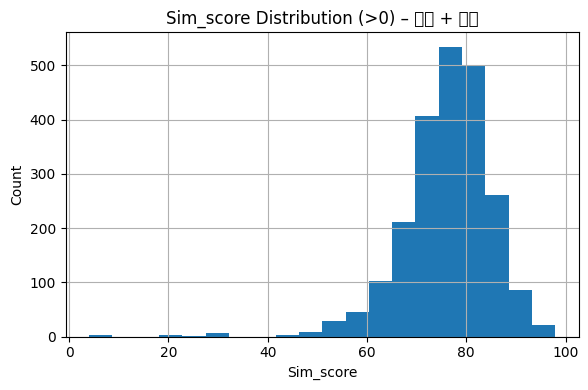


‚îÄ‚îÄ ThresholdÎ≥Ñ Ïú†ÏÇ¨ÎèÑ¬∑ÏùºÏπò ÌÜµÍ≥Ñ ‚îÄ‚îÄ
 Threshold ‚â•  Rows  Exact KW Match  KW Match %  Avg KW CosSim  Avg Summary CosSim
          90    62              56       90.32          0.980               0.915
          85   286             226       79.02          0.913               0.851
          80   756             523       69.18          0.876               0.804
          75  1353             786       58.09          0.829               0.761
          70  1791             922       51.48          0.798               0.732

Ï†ÑÏ≤¥ Exact Keyword Match: 1039


In [7]:
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# requirements:
#   pip install pandas matplotlib sentence-transformers scikit-learn tqdm
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer, util
# from ace_tools import display_dataframe_to_user      # ChatGPT Ï†ÑÏö© ‚Üí Î°úÏª¨Ïù¥Î©¥ Ï†úÍ±∞ Í∞ÄÎä•
from tqdm import tqdm

# ‚îÄ‚îÄ 0. Îç∞Ïù¥ÌÑ∞ Î°úÎìú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df = pd.read_csv('./test_result_with_keyword.csv', encoding='utf-8-sig')  # Í≤ΩÎ°ú ÏàòÏ†ï

# sim_score Ïà´Ïûê Î≥ÄÌôò
df['sim_score'] = pd.to_numeric(df['sim_score'], errors='coerce')

# ÏÑ†ÌÉù ÏöîÏïΩ Ï∂îÏ∂ú Ìï®Ïàò
def extract_selected_summary(text: str) -> str:
    if pd.isna(text): 
        return ""
    m = re.search(r'üìÑ\s*Selected Document Summary[:\-]?\s*(.*)', str(text),
                  flags=re.I | re.S)
    if m:
        seg = re.split(r'[\n\r]|‚úÖ|üîó|üìë|‚úçÔ∏è', m.group(1).strip())[0]
        return seg.strip()
    return ""

# ‚îÄ‚îÄ 1. ÌïÑÌÑ∞ÎßÅ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
target_df   = df[df['label_new'].isin(['Ïã†Í∑ú', 'Ï§ëÎ≥µ'])].copy()
non_zero_df = target_df[target_df['sim_score'] > 0].reset_index(drop=True)

# ‚îÄ‚îÄ 2. ÏãúÍ∞ÅÌôî: sim_score ÌûàÏä§ÌÜ†Í∑∏Îû® (>0) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.figure(figsize=(6,4))
non_zero_df['sim_score'].hist(bins=20)
plt.title("Sim_score Distribution (>0) ‚Äì Ïã†Í∑ú + Ï§ëÎ≥µ")
plt.xlabel("Sim_score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ‚îÄ‚îÄ 3. ÏûÑÎ≤†Îî© Î™®Îç∏ Ï§ÄÎπÑ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")  # 384‚Äëdim

# ‚îÄ‚îÄ 4. Threshold Î∂ÑÏÑù ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
thresholds = [90, 85, 80, 75, 70]
records    = []

for thr in thresholds:
    sub = non_zero_df[non_zero_df['sim_score'] >= thr].copy()
    n   = len(sub)
    
    if n == 0:          # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ placeholder
        records.append({
            "Threshold ‚â•": thr, "Rows": 0,
            "Exact KW Match": 0, "KW Match %": 0,
            "Avg KW CosSim": None, "Avg Summary CosSim": None
        })
        continue

    # ‚îÄ‚îÄ 4‚Äë1) ÌÇ§ÏõåÎìú ÏôÑÏ†Ñ ÏùºÏπò & CosSim ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    kw_exact = (sub['sim_keyword'].fillna('').str.strip() ==
                sub['keyword'].fillna('').str.strip()).sum()
    
    kw_texts_a = sub['sim_keyword'].astype(str).tolist()
    kw_texts_b = sub['keyword'].astype(str).tolist()
    
    emb_a = model.encode(kw_texts_a, convert_to_tensor=True, show_progress_bar=False)
    emb_b = model.encode(kw_texts_b, convert_to_tensor=True, show_progress_bar=False)
    
    kw_cos = util.cos_sim(emb_a, emb_b).diagonal().cpu().numpy()
    kw_cos_mean = float(np.mean(kw_cos))

    # ‚îÄ‚îÄ 4‚Äë2) ÏöîÏïΩ CosSim ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    sub['selected_summary'] = sub['final_result'].apply(extract_selected_summary)
    
    sum_texts_a = sub['generated_summary'].astype(str).tolist()
    sum_texts_b = sub['selected_summary'].astype(str).tolist()
    
    if sum_texts_a:     # Î¶¨Ïä§Ìä∏Í∞Ä ÎπÑÏñ¥ ÏûàÏßÄ ÏïäÏùÑ ÎïåÎßå Í≥ÑÏÇ∞
        emb_g = model.encode(sum_texts_a, convert_to_tensor=True, show_progress_bar=False)
        emb_s = model.encode(sum_texts_b, convert_to_tensor=True, show_progress_bar=False)
        sum_cos = util.cos_sim(emb_g, emb_s).diagonal().cpu().numpy()
        sum_cos_mean = float(np.mean(sum_cos))
    else:
        sum_cos_mean = np.nan

    # ‚îÄ‚îÄ 4‚Äë3) Í≤∞Í≥º ÏßëÍ≥Ñ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    records.append({
        "Threshold ‚â•": thr,
        "Rows": n,
        "Exact KW Match": kw_exact,
        "KW Match %": round(kw_exact / n * 100, 2),
        "Avg KW CosSim": round(kw_cos_mean, 3),
        "Avg Summary CosSim": round(sum_cos_mean, 3) if np.isfinite(sum_cos_mean) else None
    })

summary_df = pd.DataFrame(records)

# ChatGPT ÌôòÍ≤Ω ÏïÑÎãå Î°úÏª¨Ïù¥Î©¥ print/CSV Îì±ÏúºÎ°ú ÌôïÏù∏
print("\n‚îÄ‚îÄ ThresholdÎ≥Ñ Ïú†ÏÇ¨ÎèÑ¬∑ÏùºÏπò ÌÜµÍ≥Ñ ‚îÄ‚îÄ")
print(summary_df.to_string(index=False))

# (ChatGPT Ï†ÑÏö©) ‚Äì¬†Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ UI ÌëúÏãú
# display_dataframe_to_user("ThresholdÎ≥Ñ Ïú†ÏÇ¨ÎèÑ¬∑ÏùºÏπò ÌÜµÍ≥Ñ(Keyword)", summary_df)

# ‚îÄ‚îÄ 5. Ï†ÑÏ≤¥ Exact Keyword Match ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
overall_exact = (target_df['sim_keyword'].fillna('').str.strip() ==
                 target_df['keyword'].fillna('').str.strip()).sum()
print(f"\nÏ†ÑÏ≤¥ Exact Keyword Match: {overall_exact}")

/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_89030/616018530.py:16: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.xlabel("Sim_score"); plt.ylabel("Count"); plt.tight_layout(); plt.show()
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_89030/616018530.py:16: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) DejaVu Sans.
  plt.xlabel("Sim_score"); plt.ylabel("Count"); plt.tight_layout(); plt.show()
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_89030/616018530.py:16: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.xlabel("Sim_score"); plt.ylabel("Count"); plt.tight_layout(); plt.show()
/var/folders/k4/dp8jpl_52w1g8nsm7nqcr12m0000gn/T/ipykernel_89030/616018530.py:16: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  plt.xlabel("Sim_score"); plt.ylabel("Count"); plt.tight_layout(); plt.show()
/Users/yunho/op

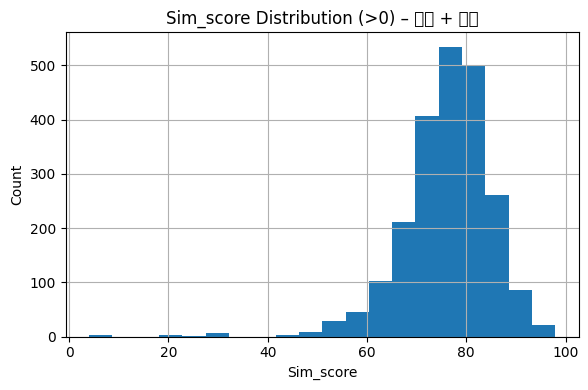

Threshold ‚â• 90: Ï§ëÎ≥µ+Exact 56 Í±¥
Threshold ‚â• 85: Ï§ëÎ≥µ+Exact 222 Í±¥
Threshold ‚â• 80: Ï§ëÎ≥µ+Exact 503 Í±¥
Threshold ‚â• 75: Ï§ëÎ≥µ+Exact 742 Í±¥
Threshold ‚â• 70: Ï§ëÎ≥µ+Exact 861 Í±¥
 Threshold ‚â•  Rows  Exact KW Match  KW Match %  Avg KW CosSim  Avg Summary CosSim
          90    62              56       90.32          0.980               0.915
          85   286             226       79.02          0.913               0.851
          80   756             523       69.18          0.876               0.804
          75  1353             786       58.09          0.829               0.761
          70  1791             922       51.48          0.798               0.732

Ï†ÑÏ≤¥ Exact Keyword Match (Ïã†Í∑ú+Ï§ëÎ≥µ, sim_score>0): 1024


In [5]:
import pandas as pd, re, numpy as np, matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# ‚îÄ‚îÄ 0. Load data ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df = pd.read_csv('test_result_with_keyword.csv', encoding='utf-8-sig')
df['sim_score'] = pd.to_numeric(df['sim_score'], errors='coerce')

# ‚îÄ‚îÄ 1. Filter (Ïã†Í∑ú¬∑Ï§ëÎ≥µ + sim_score > 0) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
mask = df['label_new'].isin(['Ïã†Í∑ú', 'Ï§ëÎ≥µ']) & (df['sim_score'] > 0)
sub_df = df[mask].reset_index(drop=True)

# ‚îÄ‚îÄ 2. Histogram ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.figure(figsize=(6,4))
sub_df['sim_score'].hist(bins=20)
plt.title("Sim_score Distribution (>0) ‚Äì Ïã†Í∑ú + Ï§ëÎ≥µ")
plt.xlabel("Sim_score"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

# ‚îÄ‚îÄ 3. ST model ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def extract_selected_summary(text: str) -> str:
    if pd.isna(text): return ""
    m = re.search(r'üìÑ\s*Selected Document Summary[:\-]?\s*(.*)', str(text),
                  flags=re.I|re.S)
    if m:
        seg = re.split(r'[\n\r]|‚úÖ|üîó|üìë|‚úçÔ∏è', m.group(1).strip())[0]
        return seg.strip()
    return ""

# ‚îÄ‚îÄ 4. Threshold loop ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
thresholds = [90, 85, 80, 75, 70]
results    = []

for thr in thresholds:
    df_thr = sub_df[sub_df['sim_score'] >= thr].copy()
    n      = len(df_thr)
    if n == 0:
        results.append([thr, 0, 0, 0, None, None]); continue

    # 4‚Äë1) Exact keyword match
    kw_exact = (df_thr['sim_keyword'].str.strip()
                == df_thr['keyword'].str.strip()).sum()
    exact_mask       = sub_df['sim_keyword'].str.strip() == sub_df['keyword'].str.strip()
    thr_mask   = sub_df['sim_score'] >= thr
    dup_cnt    = ( exact_mask & thr_mask & (sub_df['label_new']=='Ï§ëÎ≥µ') ).sum()
    print(f"Threshold ‚â• {thr}: Ï§ëÎ≥µ+Exact {dup_cnt} Í±¥")
    
    # 4‚Äë2) Keyword cosine similarity
    emb_sim_kw = model.encode(df_thr['sim_keyword'].astype(str).tolist(),
                              convert_to_tensor=True, show_progress_bar=False)
    emb_kw     = model.encode(df_thr['keyword'].astype(str).tolist(),
                              convert_to_tensor=True, show_progress_bar=False)
    kw_cos     = util.cos_sim(emb_sim_kw, emb_kw).diagonal().cpu().numpy().mean()

    # 4‚Äë3) Summary cosine similarity
    df_thr['sel_sum'] = df_thr['final_result'].apply(extract_selected_summary)
    emb_gen_sum = model.encode(df_thr['generated_summary'].astype(str).tolist(),
                               convert_to_tensor=True, show_progress_bar=False)
    emb_sel_sum = model.encode(df_thr['sel_sum'].astype(str).tolist(),
                               convert_to_tensor=True, show_progress_bar=False)
    sum_cos     = util.cos_sim(emb_gen_sum, emb_sel_sum).diagonal().cpu().numpy().mean()

    results.append([thr, n, kw_exact, round(kw_exact/n*100,2),
                    round(kw_cos,3), round(sum_cos,3)])

# ‚îÄ‚îÄ 5. Display ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
out = pd.DataFrame(results, columns=[
        'Threshold ‚â•','Rows','Exact KW Match','KW Match %',
        'Avg KW CosSim','Avg Summary CosSim'])
print(out.to_string(index=False))

# ‚îÄ‚îÄ 6. Ï†ÑÏ≤¥ Exact match ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
overall = (sub_df['sim_keyword'].str.strip() ==
           sub_df['keyword'].str.strip()).sum()
print(f"\nÏ†ÑÏ≤¥ Exact Keyword Match (Ïã†Í∑ú+Ï§ëÎ≥µ, sim_score>0): {overall}")


In [6]:
# ‚îÄ‚îÄ 4. Threshold loop ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
thresholds = [90, 85, 80, 75, 70]
results    = []

for thr in thresholds:
    thr_mask = sub_df['sim_score'] >= thr
    df_thr   = sub_df[thr_mask].copy()
    n        = len(df_thr)
    if n == 0:
        results.append([thr, 0, 0, 0,   # Rows, Dup_Total, Dup_Exact
                        0, 0, None, None]); continue

    # ‚îÄ‚îÄ 4‚Äë1) Exact keyword match
    exact_mask = sub_df['sim_keyword'].str.strip() == sub_df['keyword'].str.strip()
    kw_exact   = (df_thr['sim_keyword'].str.strip() == df_thr['keyword'].str.strip()).sum()

    # ‚îÄ‚îÄ Ï§ëÎ≥µ Ìñâ Ïπ¥Ïö¥Ìä∏ (Exact Ïó¨Î∂Ä ÏÉÅÍ¥ÄÏóÜÏùå)
    dup_total = (thr_mask & (sub_df['label_new'] == 'Ï§ëÎ≥µ')).sum()

    # ‚îÄ‚îÄ Ï§ëÎ≥µ + Exact Ïπ¥Ïö¥Ìä∏
    dup_exact = (thr_mask & exact_mask & (sub_df['label_new'] == 'Ï§ëÎ≥µ')).sum()

    print(f"Threshold ‚â• {thr}:  Ï§ëÎ≥µ Ï†ÑÏ≤¥ {dup_total} Í±¥  /  Ï§ëÎ≥µ+Exact {dup_exact} Í±¥")

    # ‚îÄ‚îÄ 4‚Äë2) Keyword CosSim
    emb_sim_kw = model.encode(df_thr['sim_keyword'].astype(str).tolist(),
                              convert_to_tensor=True, show_progress_bar=False)
    emb_kw     = model.encode(df_thr['keyword'].astype(str).tolist(),
                              convert_to_tensor=True, show_progress_bar=False)
    kw_cos     = util.cos_sim(emb_sim_kw, emb_kw).diagonal().cpu().numpy().mean()

    # ‚îÄ‚îÄ 4‚Äë3) Summary CosSim
    df_thr['sel_sum'] = df_thr['final_result'].apply(extract_selected_summary)
    emb_gen_sum = model.encode(df_thr['generated_summary'].astype(str).tolist(),
                               convert_to_tensor=True, show_progress_bar=False)
    emb_sel_sum = model.encode(df_thr['sel_sum'].astype(str).tolist(),
                               convert_to_tensor=True, show_progress_bar=False)
    sum_cos     = util.cos_sim(emb_gen_sum, emb_sel_sum).diagonal().cpu().numpy().mean()

    # Í≤∞Í≥º Ï†ÄÏû•
    results.append([thr, n, dup_total, dup_exact,
                    kw_exact, round(kw_exact/n*100,2),
                    round(kw_cos,3), round(sum_cos,3)])

# ‚îÄ‚îÄ 5. Display ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
out = pd.DataFrame(results, columns=[
        'Threshold ‚â•','Rows',
        'Dup Total','Dup + Exact',
        'Exact KW Match','KW Match %',
        'Avg KW CosSim','Avg Summary CosSim'])
print(out.to_string(index=False))


Threshold ‚â• 90:  Ï§ëÎ≥µ Ï†ÑÏ≤¥ 62 Í±¥  /  Ï§ëÎ≥µ+Exact 56 Í±¥
Threshold ‚â• 85:  Ï§ëÎ≥µ Ï†ÑÏ≤¥ 278 Í±¥  /  Ï§ëÎ≥µ+Exact 222 Í±¥
Threshold ‚â• 80:  Ï§ëÎ≥µ Ï†ÑÏ≤¥ 706 Í±¥  /  Ï§ëÎ≥µ+Exact 503 Í±¥
Threshold ‚â• 75:  Ï§ëÎ≥µ Ï†ÑÏ≤¥ 1211 Í±¥  /  Ï§ëÎ≥µ+Exact 742 Í±¥
Threshold ‚â• 70:  Ï§ëÎ≥µ Ï†ÑÏ≤¥ 1531 Í±¥  /  Ï§ëÎ≥µ+Exact 861 Í±¥
 Threshold ‚â•  Rows  Dup Total  Dup + Exact  Exact KW Match  KW Match %  Avg KW CosSim  Avg Summary CosSim
          90    62         62           56              56       90.32          0.980               0.915
          85   286        278          222             226       79.02          0.913               0.851
          80   756        706          503             523       69.18          0.876               0.804
          75  1353       1211          742             786       58.09          0.829               0.761
          70  1791       1531          861             922       51.48          0.798               0.732
